In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#import csv file 
table = pd.read_csv("../input/wine-quality/winequality-red-2.csv", usecols = ['sulphates','fixed acidity', 'volatile acidity', 'citric acid', 'quality'])

# За даними набору даних, що додається оцінити: 
# - статистичні характеристики окремих показників;   

In [3]:
from scipy import stats
from statsmodels import robust

#func for calculating weighted median
# def weighted_median(data, weights):
#     data, weights = np.array(data).squeeze(), np.array(weights).squeeze()
#     s_data, s_weights = map(np.array, zip(*sorted(zip(data, weights))))
#     midpoint = 0.5 * sum(s_weights)
#     if any(weights > midpoint):
#         w_median = (data[weights == np.max(weights)])[0]
#     else:
#         cs_weights = np.cumsum(s_weights)
#         idx = np.where(cs_weights <= midpoint)[0][-1]
#         if cs_weights[idx] == midpoint:
#             w_median = np.mean(s_data[idx:idx+2])
#         else:
#             w_median = s_data[idx+1]
#     return w_median

# sulph = table["sulphates"]
# quality = table["quality"]

# pd.DataFrame.from_dict(
#     {
#     "Середнє значення вмісту сульфатів" : round(sulph.mean(),3),
#     "Середнє зважене значення вмісту сульфатів" : round(np.average(sulph, weights = quality),3),
#     "Середнє усічене значення вмісту сульфатів" : round(stats.trim_mean(sulph, 0.1),3),
#     "Медіана" : round(sulph.median(),3),
#     "Зважена медіана" : weighted_median(sulph,quality),
#     "Робастне значення вмісту сульфатів" : round(robust.scale.mad(sulph),3)
#     }, orient = "index", columns = ["Значення"])
table.describe()

,sulphates,fixed acidity,volatile acidity,citric acid,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.658149,8.319637,0.527821,0.270976,5.636023
std,0.169507,1.741096,0.179060,0.194801,0.807569
min,0.330000,4.600000,0.120000,0.000000,3.000000
25%,0.550000,7.100000,0.390000,0.090000,5.000000
50%,0.620000,7.900000,0.520000,0.260000,6.000000
75%,0.730000,9.200000,0.640000,0.420000,6.000000
max,2.000000,15.900000,1.580000,1.000000,8.000000


На основі отриманих результатів можна зробити висновок що досить велике середньоквадратичне відхилення як і розмах наявний у **fixed acidity**. Решта змінних мають невелике відхилення.

# - оцінити параметри регресійних моделей за суттєвими чинниками якості вина (quality). 

In [4]:
model_linear = LinearRegression().fit(np.array(table['sulphates']).reshape((-1,1)), table['quality'])

res = {
    "Незалежний елемент" : model_linear.intercept_,
    "Коефіціент" : model_linear.coef_,
    "Оцінка прогнозування" : model_linear.score(np.array(table['sulphates']).reshape((-1,1)), table['quality'])   
}

pd.DataFrame.from_dict(res)

,Незалежний елемент,Коефіціент,Оцінка прогнозування
0,4.84775,1.197712,0.0632


In [5]:
table.corr()

,sulphates,fixed acidity,volatile acidity,citric acid,quality
sulphates,1.000000,0.183006,-0.260987,0.312770,0.251397
fixed acidity,0.183006,1.000000,-0.256131,0.671703,0.124052
volatile acidity,-0.260987,-0.256131,1.000000,-0.552496,-0.390558
citric acid,0.312770,0.671703,-0.552496,1.000000,0.226373
quality,0.251397,0.124052,-0.390558,0.226373,1.000000


In [6]:
model = sm.OLS.from_formula(formula="quality ~ sulphates", data=table).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.80e-24
Time:                        12:52:52   Log-Likelihood:                -1874.4
No. Observations:                1599   AIC:                             3753.
Df Residuals:                    1597   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8477      0.078     61.818      0.000       4.694       5.002
sulphates      1.1977      0.115     10.380      0.000       0.971       1.424
==============================================================================
Omnibus:                       12.685   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.098
Skew:                           0.083   Prob(JB):                     0.000194
Kurtosis:                       3.479   Cond. No.                         8.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коефіцієнт детермінації є досить низьким що показує малу точність і спростування нульової гіпотези.

# Провести статистичну оцінку значущості та довірчих інтервалів для отриманих моделей.

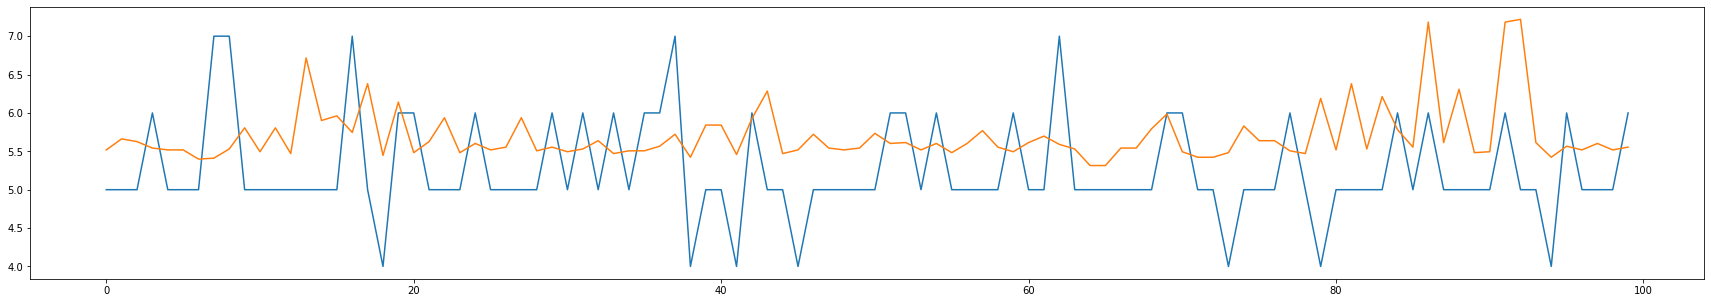

In [7]:
pred = model.predict(table)[:100]
real = table["quality"][:100]

xs = np.arange(len(table))[:100]

fig = plt.figure(figsize = (30, 5))

plt.plot(xs, real)
plt.plot(xs, pred)

За результатами графіку можна побачити що точність є низькою.